In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

In [2]:
df = pd.read_csv('driving_log.csv',
                names=['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])
df.head(0)

,center,left,right,steering_angle,throttle,break,speed


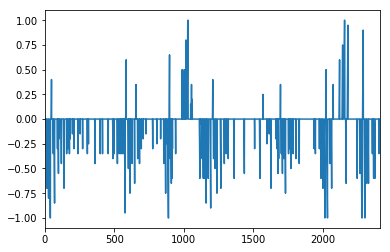

In [3]:
df['steering_angle'].plot();

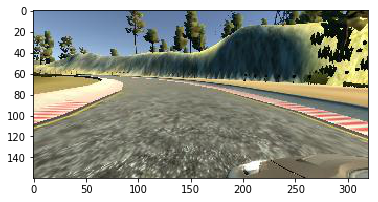

In [4]:
img = Image.open(df['left'][0])
plt.imshow(img);

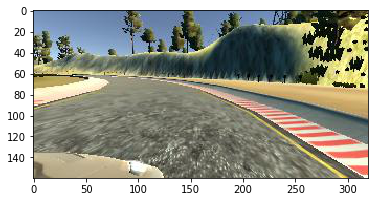

In [5]:
img2 = Image.open(df['right'][0])
plt.imshow(img2);

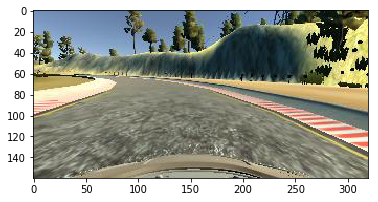

In [6]:
img3 = Image.open(df['center'][0])
plt.imshow(img3);

In [7]:
#  convert image to matrix
img = np.asarray(img)
img.shape

(160, 320, 3)

In [9]:
#  convert image to matrix
def loadImage(fname):
    return np.asarray(Image.open(fname))

#  image range, cutting the bottom and top of the photo
def process_image(img):
    return img[10:130:2, ::4, :]

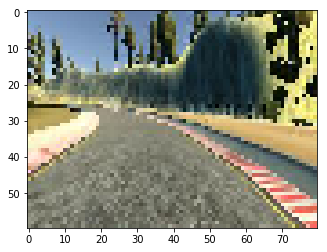

In [11]:
img = process_image(loadImage(df['center'][0]))
plt.imshow(img);

In [26]:
#  Entry to the neural network
#  Reduce the image and save to the list
X = [process_image(loadImage(fname)) for fname in df['center']]
X += [process_image(loadImage(fname)) for fname in df['left']]
X += [process_image(loadImage(fname)) for fname in df['right']]

#  Prediction
y = np.array(df['steering_angle'])
y = np.concatenate([y, y+0.4, y-0.4])

In [27]:
X = np.array(X)
print(X.shape)
print(y.shape)

(7227, 60, 80, 3)
(7227,)


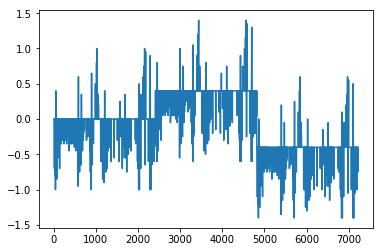

In [28]:
#  Plot for left, right and center cameras
plt.plot(y)
plt.show();

In [ ]:
np.save('X.npy', X)
np.save('Y.npy', Y)